In [2]:
    #Project Titanic Case

# Project Titanic Case
## 1. Data

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
train_train = pd.read_csv("./train.csv")
test_test = pd.read_csv("./test.csv")


In [5]:
train_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test_test.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Note:
-SibSp:# of siblings/ spouses aboard the Titanic
-Parch:# of parents / children aboard the Titanic
-ticket:Ticket number
-Cabin: Cabin number

#### Note:

- SibSp:# of siblings/ spouses aboard the Titanic 
- Parch:# of parents / children aboard the Titanic 
- ticket:Ticket number 
- Cabin: Cabin number

In [7]:
train_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### PassengerID
The first column is the passengerID. The ID for a passenger is just a number to identify this passenger in this dataset. So this column is not really a part of the information we need to train the model. Let's make it the index instead.

In [9]:
train_train.set_index(train_train.PassengerId, inplace = True)

In [93]:
passenger_ids = train_train.index
print(passenger_ids)

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
      dtype='int64', name='PassengerId', length=891)


In [10]:
train_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_train.drop('PassengerId', axis = 1, inplace = True)

In [12]:
train_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test_df = pd.read_csv("./test.csv", index_col = "PassengerId")
train_train =pd.read_csv("./train.csv", index_col = "PassengerId")


In [14]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# 1.1 Feature Classification: Categorical vs Numerical
* This help us select the appropriate plots for visualization

#### Which features are categorical
* Categorical Features: `nominal`, `ordinal`, `ratio`, `interval`.
* To classify the samples into sets of similar samples

#### Which features are numerical
* Numerical features: `discrete`, `continuous`, `timeseries`.
* These values change from sample to sample


In [16]:
train_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [17]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* Categorical: `Survived`, `Sex`, `Embarked`, `Pclass(ordinal)`, `SibSp`, `Parch`.
* Numerical: `Age`, `Fare`(discrete)
* Mix types of data: `Ticket`, `Cabin`
* Contain Error/Type: `Name`
* Blank or Null: `Cabin` > `Age` > `Embarked`
* Various data type: string int float

According to the data dictionary, we know that if a passenger is marked as 1, he or she survived. Clearly the number 1 or 0 is a flag for the person's survivorship. Yet the data type of the column is int64, whici is a numerical type. We can change that with the following command:

In [18]:
train_train["Survived"]= train_train["Survived"].astype("category")

In [19]:
train_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [20]:
train_train["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [21]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
        
convert_cat(train_train,features)
convert_cat(test_df,features)

train_train.info()
test_df.info()

## 1.1.1 Distribution of Numerical feature values across the samples

train_train.describe()

## 1.1.2 Distribution of Categorical Features

In [22]:
train_train.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 2.Exploratory Data Analysis (EDA)

### 2.1 Colerrating categorical features:
* Categorical: `Survived`, `Sex`, `Embarked`, `Pclass(ordinal)`, `SibSp`, `Parch`.
### Target variable: `Survived`

In [23]:
train_train["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


In [24]:
train_train["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Conclusion: Only `38%` survived the disaster. So the data training is suffered from data imbalance but it is not severe so no sampling data process will be done here.

### `sex`


In [25]:
train_train["Sex"].value_counts().to_frame()

,Sex
male,577
female,314


In [26]:
train_train["Sex"].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

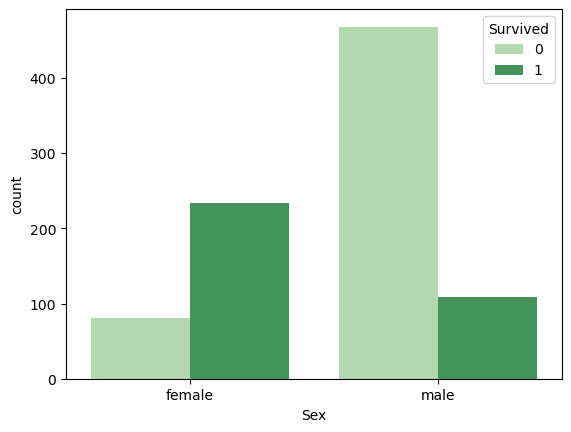

In [27]:
sns.countplot(data=train_train, x= 'Sex',hue='Survived', palette="Greens")

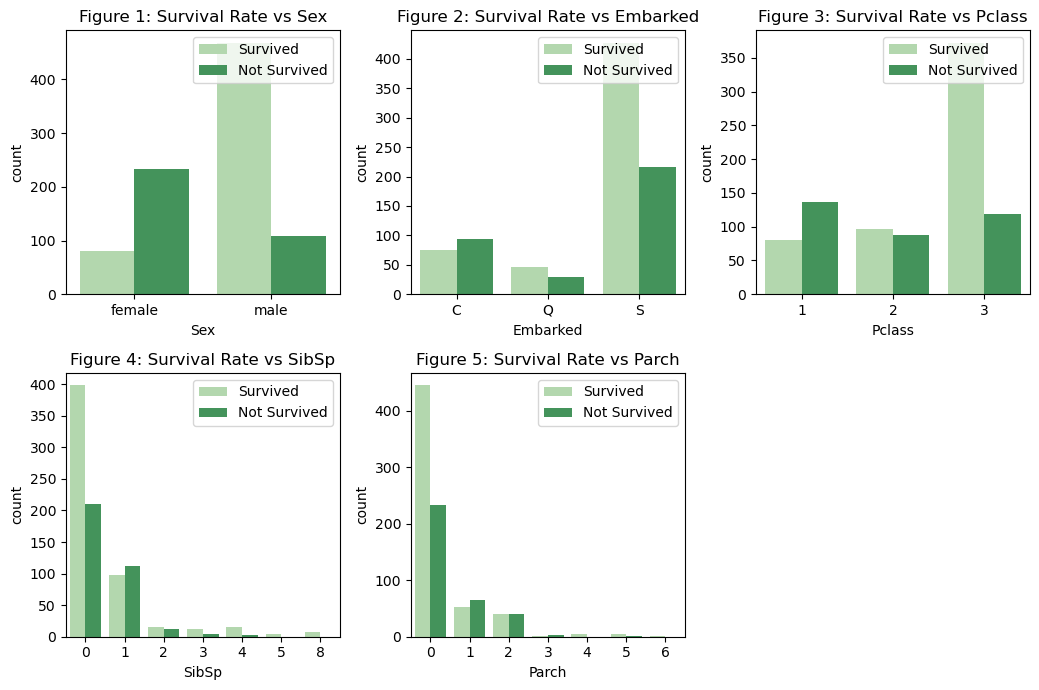

In [28]:
col = ["Sex", "Embarked",'Pclass','SibSp', 'Parch']

n_rows= 2
n_cols= 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))
for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols+c; # loop through each index
        if i < len(col):
            ax_i = ax[r,c]
            sns.countplot(data= train_train, x=col[i], hue="Survived", palette="Greens", ax =ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {col[i]}")
            ax_i.legend(title='', loc='upper right', labels={'Survived', 'Not Survived'})
ax.flat[-1].set_visible(False) #Remove the last subplot
            
plt.tight_layout()
plt.show()

Hello


### Observation:
* Survival Rate:
    - Fig1: Female survival rate > male
    - Fig2: Most People embarked on Southampon(S), and also has the highest people not survived
    - Fig3: 1st class has the highest survival rate. We can conclude that the higher tier the class, the higher the survival rate
    - Fig4: People who go alone are mostly not survived. The number of passenger with 1-2 famili members are likely to survive
    - Fig5: like Fig4

### 2.2 EDA for Numerical Features
* Numerical Features ( continuous): `Age`, `Fare`

#### Age

In [29]:
train_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

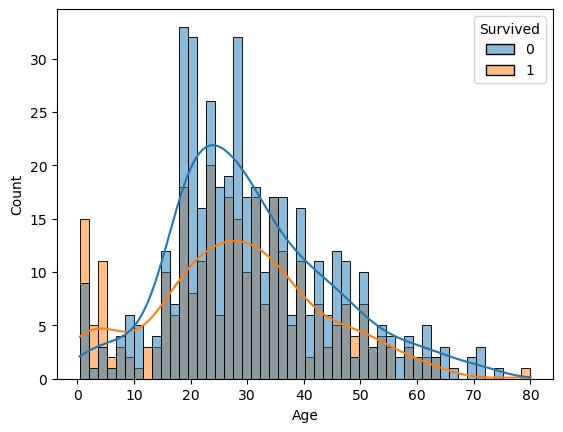

In [30]:
sns.histplot(data= train_train, x='Age',hue='Survived', bins=50, kde=True)


* Most people age between 18-40 
* Most children and the eldered are survived

#### Fare

In [31]:
train_train["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

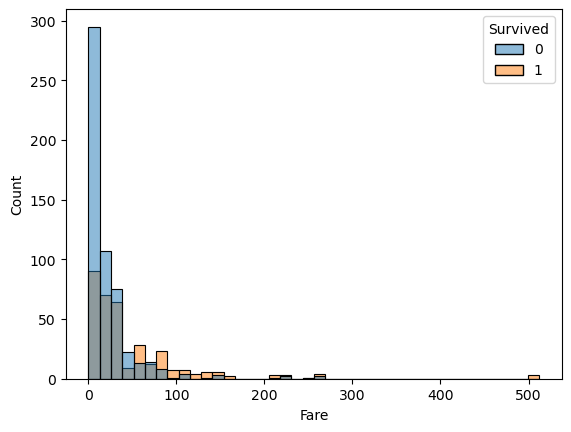

In [32]:
sns.histplot(data= train_train, x='Fare',hue="Survived", bins=40)


# 3. Feature Engineering and Data Wrangling


### Feature Engineering

## Name


In [33]:
train_train["Name"].to_frame()

,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"
...,...
887,"Montvila, Rev. Juozas"
888,"Graham, Miss. Margaret Edith"
889,"Johnston, Miss. Catherine Helen ""Carrie"""


In [34]:
train_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


* We can see that each name will have the titles of the person name: `Mr.`, `Ms.`,...
* Even though it sounds irrelevent to the fact that they survived or not, I think it will somehow improve the model, like Mrs means that the SibSp is also related. So I will extract the title of the name by each person.

In [35]:
def extract_title(name):
    etr = name.split(',')[1].split('.')[0].rstrip('.')
    return etr.strip()

train_train['Title'] = train_train['Name'].apply(lambda name: extract_title(name))

In [36]:
train_train['Title']

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Title, Length: 891, dtype: object

In [37]:
train_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

#### There is "the" in the code so I will debug

In [38]:
train_train[train_train['Name'].str.contains('the')]['Name']

PassengerId
157                     Gilnagh, Miss. Katherine "Katie"
242                       Murphy, Miss. Katherine "Kate"
301             Kelly, Miss. Anna Katherine "Annie Kate"
363                      Barbara, Mrs. (Catherine David)
389                                 Sadlier, Mr. Matthew
419                           Matthews, Mr. William John
441          Hart, Mrs. Benjamin (Esther Ada Bloomfield)
449                       Baclini, Miss. Marie Catherine
474         Jerwan, Mrs. Amin S (Marie Marthe Thuillard)
534               Peter, Mrs. Catherine (Catherine Rizk)
547                    Beane, Mrs. Edward (Ethel Clarke)
557    Duff Gordon, Lady. (Lucille Christiana Sutherl...
577                                 Garside, Miss. Ethel
658                        Bourke, Mrs. John (Catherine)
671    Brown, Mrs. Thomas William Solomon (Elizabeth ...
698                     Mullens, Miss. Katherine "Katie"
711     Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")
760    Rothes, the 

There is a problem with the cut string
line 760

In [39]:
train_train[train_train['Name'].str.contains('the')]['Title']

PassengerId
157            Miss
242            Miss
301            Miss
363             Mrs
389              Mr
419              Mr
441             Mrs
449            Miss
474             Mrs
534             Mrs
547             Mrs
557            Lady
577            Miss
658             Mrs
671             Mrs
698            Miss
711            Mlle
760    the Countess
778            Miss
889            Miss
Name: Title, dtype: object

In [40]:
train_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [41]:
# apply the same for the test_df
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [42]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

<Axes: xlabel='Title', ylabel='Count'>

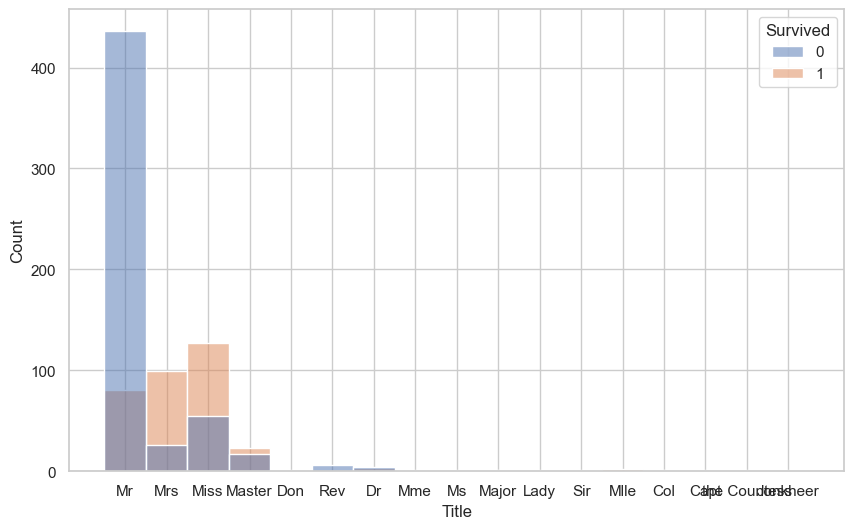

In [43]:


sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=train_train, x='Title', hue='Survived', ax=ax)


### We can see that the major title name are Mr, Mrs, Miss(Ms), Master. The other major titles are not as significant to the model as the first four ones, so I will integrate the remains as "Other"

In [44]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == 'Ms':
        return "Miss"
    else:
        return "Others"
    
train_train['Title']= train_train['Title'].apply(lambda title: group_title(title))
print(train_train['Title'])
test_df['Title']= test_df['Title'].apply(lambda title: group_title(title))



PassengerId
1          Mr
2         Mrs
3        Miss
4         Mrs
5          Mr
        ...  
887    Others
888      Miss
889      Miss
890        Mr
891        Mr
Name: Title, Length: 891, dtype: object


<Axes: xlabel='Title', ylabel='count'>

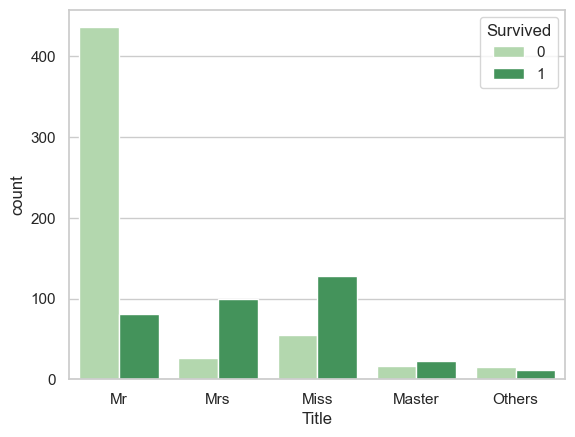

In [45]:
sns.countplot(data = train_train, x='Title', hue="Survived", palette="Greens")

## Family

Since `SibSp` and `Parch` is sort of similar to each other, we are going to group this into 1 group only for simplicity for our training models

In [46]:
train_train['FamilySize']= train_train['SibSp'].astype('int') + train_train['Parch'].astype('int') +1
test_df['FamilySize']= test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [47]:
train_train['FamilySize']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: FamilySize, Length: 891, dtype: int32

<Axes: xlabel='FamilySize', ylabel='count'>

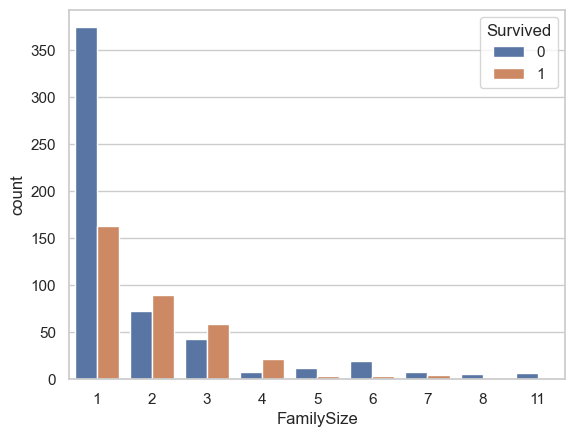

In [48]:
sns.countplot(data = train_train, x='FamilySize', hue='Survived')

* Conclusion: Solo clients are unlikely to survive, and clients with medium-sized families have a higher chance to make it. However, if any families have more than 4 people, they are also likely to be dead. 
* I will group group 5-11 as a group for simplicity in model training

In [49]:
train_train['FamilyCat']=pd.cut(train_train['FamilySize'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])
print(train_train['FamilyCat'])
test_df['FamilyCat']=pd.cut(test_df['FamilySize'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])


PassengerId
1      Small
2      Small
3       Solo
4      Small
5       Solo
       ...  
887     Solo
888     Solo
889    Small
890     Solo
891     Solo
Name: FamilyCat, Length: 891, dtype: category
Categories (4, object): ['Solo' < 'Small' < 'Medium' < 'Large']


<Axes: xlabel='FamilyCat', ylabel='Count'>

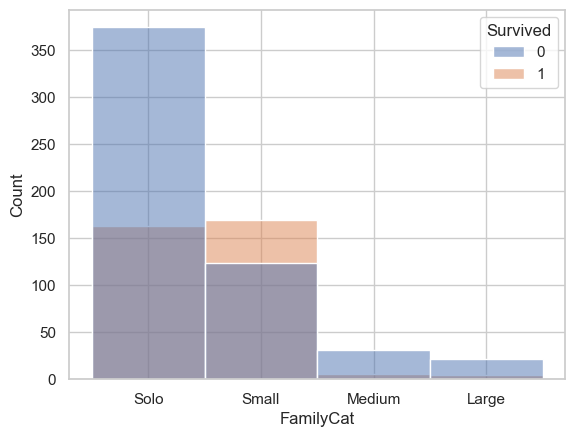

In [50]:
sns.histplot(data = train_train, x='FamilyCat', hue="Survived")

### Data Wrangling

In [51]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', "FamilyCat"]
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'FamilyCat']


#### 1. Find and fill missing data


In [52]:
def display_missing(df, feature_cols):
    nn = df.shape[0] ## print out numbers of rows and columns .shape = (rows, cols)
    print(nn)
    for col in feature_cols:
        
        missing_count = df[col].isnull().sum()
        if missing_count >0:
            print(f"Col {col} has {missing_count*100/nn:.2f}% missing values.")

display_missing(train_train, feature_cols)

display_missing(test_df, feature_cols)



891
Col Age has 19.87% missing values.
Col Embarked has 0.22% missing values.
418
Col Age has 20.57% missing values.
Col Fare has 0.24% missing values.


We can see that the Age column has signigicant percentage of missing values, whereas the Embarked one is insignificant so we will consider only the Age column

#### Filling missing values in Age column
We will consider their age based on other aspects. We will choose the `Sex` column since their average age is diffirent and `Pclass` column because for example if a person purchase a first class seat, there is a high change that person's age is between 50-60, .... 

In [62]:
ageBySexClass = train_train.groupby(['Sex', 'Pclass']).median()['Age']
# group sex and pclass as a unique group
print(ageBySexClass)

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_14280\432939546.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ageBySexClass = train_train.groupby(['Sex', 'Pclass'], group_keys=True).median()['Age']


In [70]:
train_train['Age'] = train_train.groupby(['Sex', 'Pclass'], group_keys=False)['Age'].apply(lambda x : x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'], group_keys=False)['Age'].apply(lambda x : x.fillna(x.median()))

# group Sex, Pclass, Age is a slice notation that selects only the Age column and apply lambda
# to fill in any missing value

In [68]:
train_train['Age'].head(10)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6     25.0
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [71]:
display_missing(train_train, feature_cols)
display_missing(test_df, feature_cols)

891
Col Embarked has 0.22% missing values.
418
Col Fare has 0.24% missing values.


In [57]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_change = Pipeline( steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create a pipeline : the imputer will replace any missing value with the median of itself
#                     the scaler to standarsize the Fare column by subtracting the mean value of column and 
#                     diving by the standard deviation
category_change= Pipeline( steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')) ## change code from text to binary code
])


In [67]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_change, num_features),
    ('cat', category_change, cat_features)
])
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'FamilyCat'])])


In [70]:
X = train_train[feature_cols]
Y = train_train['Survived']

X_test = test_df[feature_cols]

X = preprocessor.transform(X)  # X_train and X_validation
X_test= preprocessor.transform(X_test)



In [71]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

# 4. Modeling Training

In [73]:
X_train.shape, X_val.shape, X_test.shape


((712, 19), (179, 19), (418, 19))

In [80]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = "liblinear", max_iter = 1000)
log_reg.fit(X_train, Y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [81]:
log_reg.score(X_val, Y_val)

0.8156424581005587

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyCat
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,Solo
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,Small
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,Solo
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,Solo
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1,Solo
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Others,1,Solo
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1,Solo


In [94]:
predictions = log_reg.predict(X_test)
passenger_ids_test = test_df.index

# create a DataFrame with the passenger IDs and their predicted survival values
output = pd.DataFrame({'PassengerId': passenger_ids_test, 'Survived': predictions})

# write the DataFrame to a CSV file
output.to_csv('predictions.csv', index=False)

In [98]:
pd.read_csv("./predictions.csv").

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
